In [2]:
import os
import json
import pandas as pd
from PIL import Image
import sys

sys.path.append(os.path.abspath("../"))  # Ensure src is in sys.path

from utils.VisualisationUtils import *

In [30]:
dataset_dir = r'C:\Users\Sai\Documents\Neu\Masters Project\PerceptionPrivacy\datasets\VizWiz_FewShot'
annotations_dir = os.path.join(dataset_dir)
images_dir = os.path.join(dataset_dir, 'base_images', 'images')

In [6]:
annotations = json.load(open(os.path.join(annotations_dir, 'base_annotations.json')))

In [12]:
print(f'Number of images: {len(annotations["images"])}')
print(f'Number of annotations: {len(annotations["annotations"])}')
print(f'Number of categories: {len(annotations["categories"])}')

Number of images: 4229
Number of annotations: 8043
Number of categories: 100


In [13]:
categories_df = pd.DataFrame(annotations['categories'])
images_df = pd.DataFrame(annotations['images'])
annotations_df = pd.DataFrame(annotations['annotations'])

In [15]:
categories_df.set_index('id', inplace=True)

In [ ]:
# Print all the categories
pd.set_option('display.max_rows', None)
print(categories_df)

     isthing               name
id                             
1          1             banana
2          1        ceiling_fan
3          1     computer_mouse
4          1       electric_fan
5          1                key
6          1  computer_keyboard
7          1             laptop
8          1          microwave
9          1            monitor
10         1                pen
11         1            perfume
12         1             pillow
13         1              pizza
14         1              plate
15         1            printer
16         1               sock
17         1              spoon
18         1              stove
19         1         television
20         1               vase
21         1              apple
22         1                bed
23         1               book
24         1               bowl
25         1                car
26         1              chair
27         1              couch
28         1                dog
29         1               oven
30      

In [43]:
# laptop, wallet, cell_phone, ipad
filtered_categories = categories_df[categories_df['name'].isin(['laptop', 'cell_phone', 'ipad'])]
print(filtered_categories)

     isthing        name
id                      
7          1      laptop
84         1  cell_phone
100        1        ipad


In [46]:
# Numebr of annotations for each category
fil_annotations_df = annotations_df[annotations_df['category_id'].isin(filtered_categories.index)]
print(fil_annotations_df['category_id'].value_counts())
print('Number of Images', len(fil_annotations_df['image_id'].unique()))

category_id
7      486
84      85
100     24
Name: count, dtype: int64
Number of Images 575


<Figure size 2000x1000 with 0 Axes>

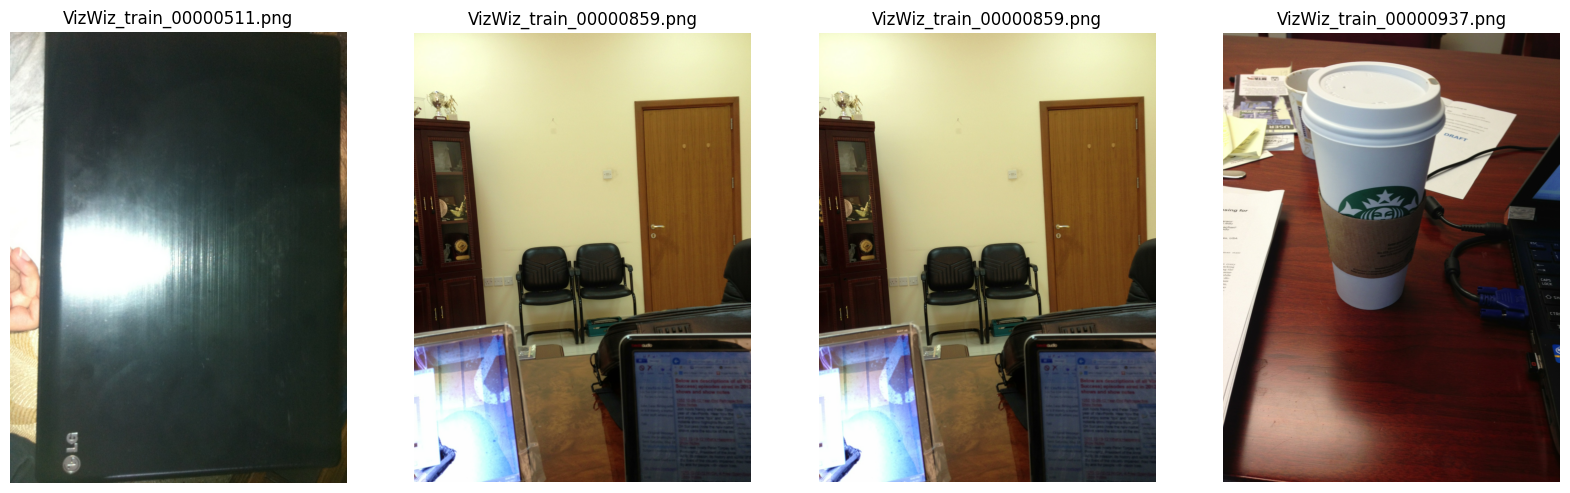

<Figure size 2000x1000 with 0 Axes>

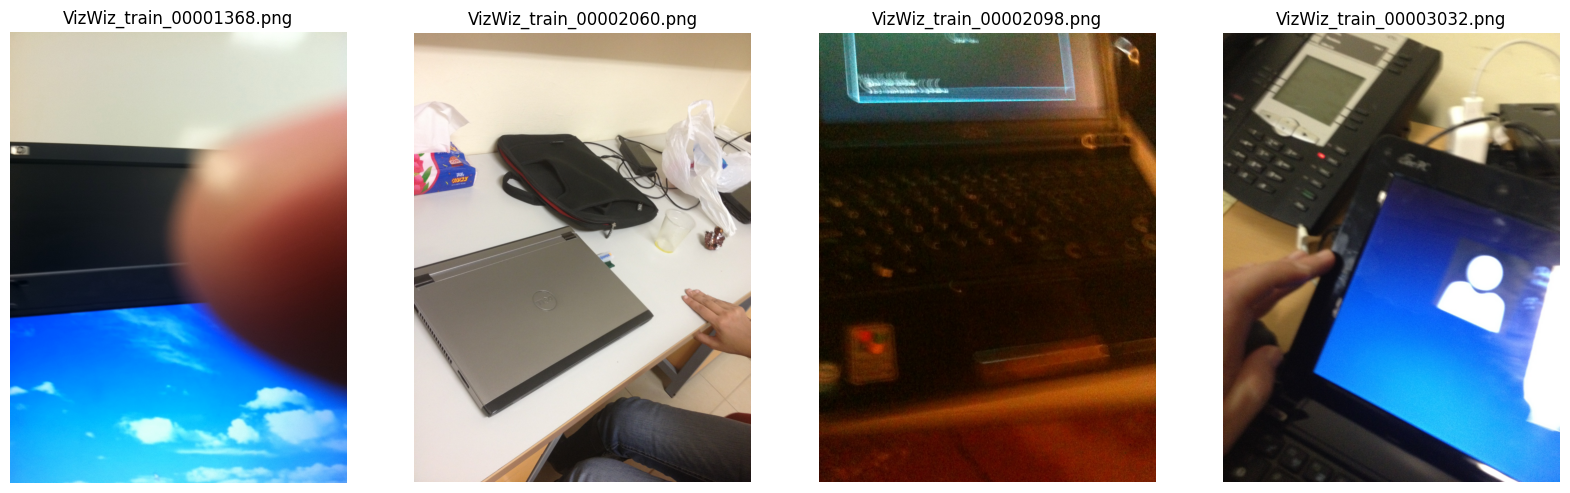

<Figure size 2000x1000 with 0 Axes>

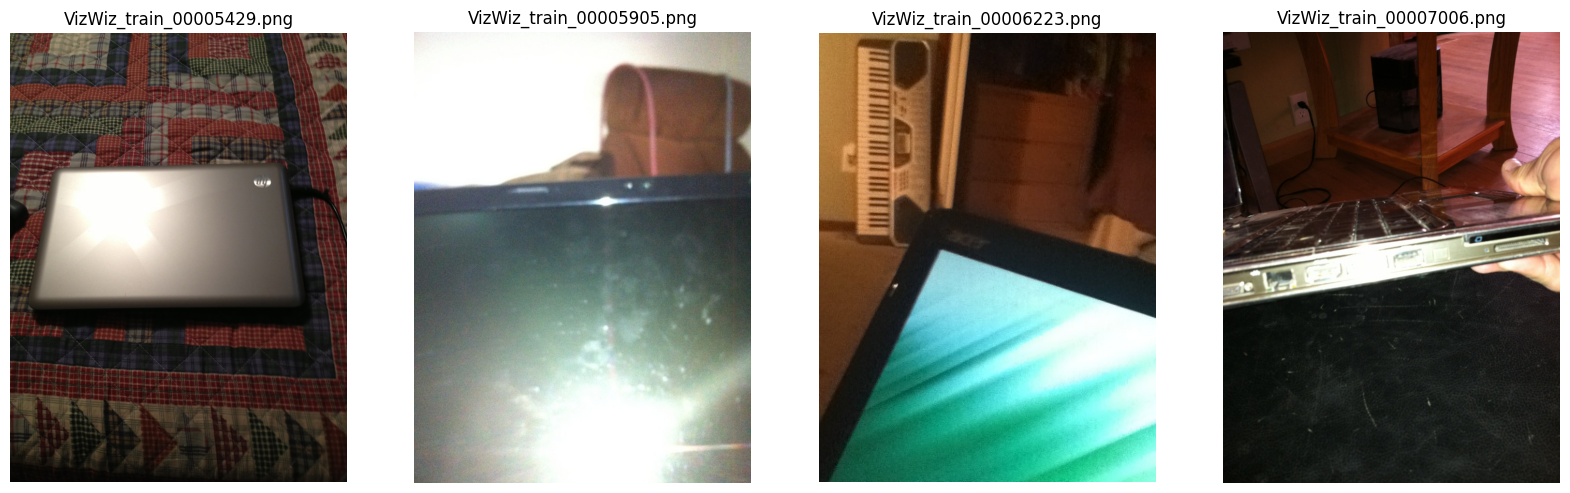

<Figure size 2000x1000 with 0 Axes>

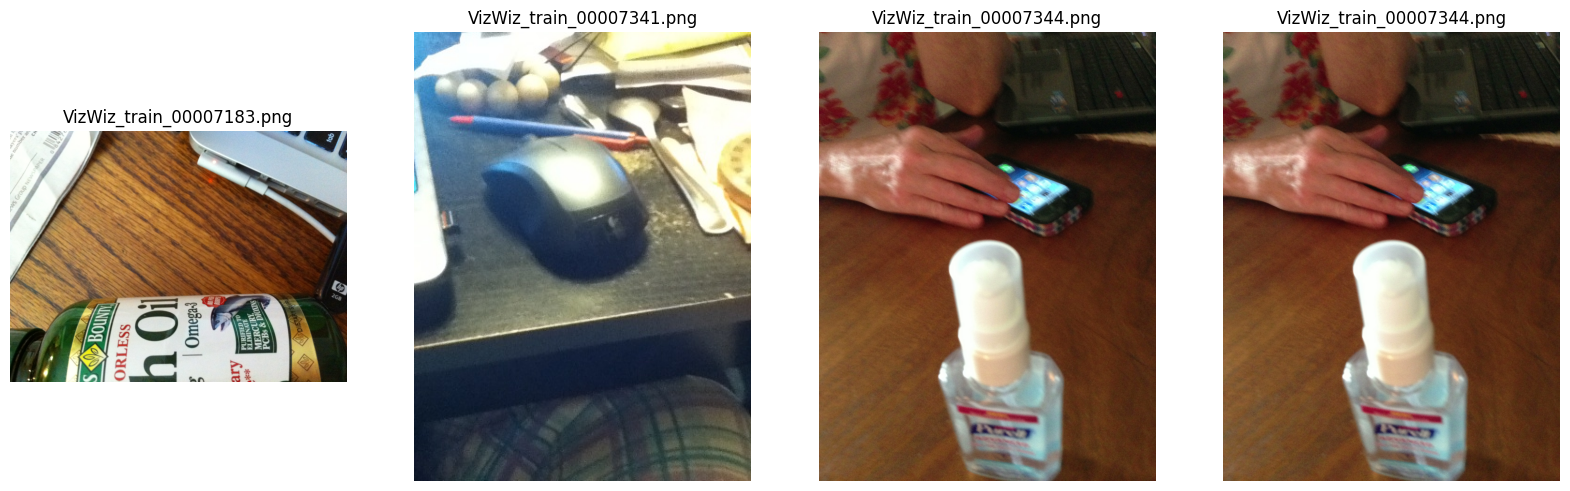

KeyboardInterrupt: 

<Figure size 2000x1000 with 0 Axes>

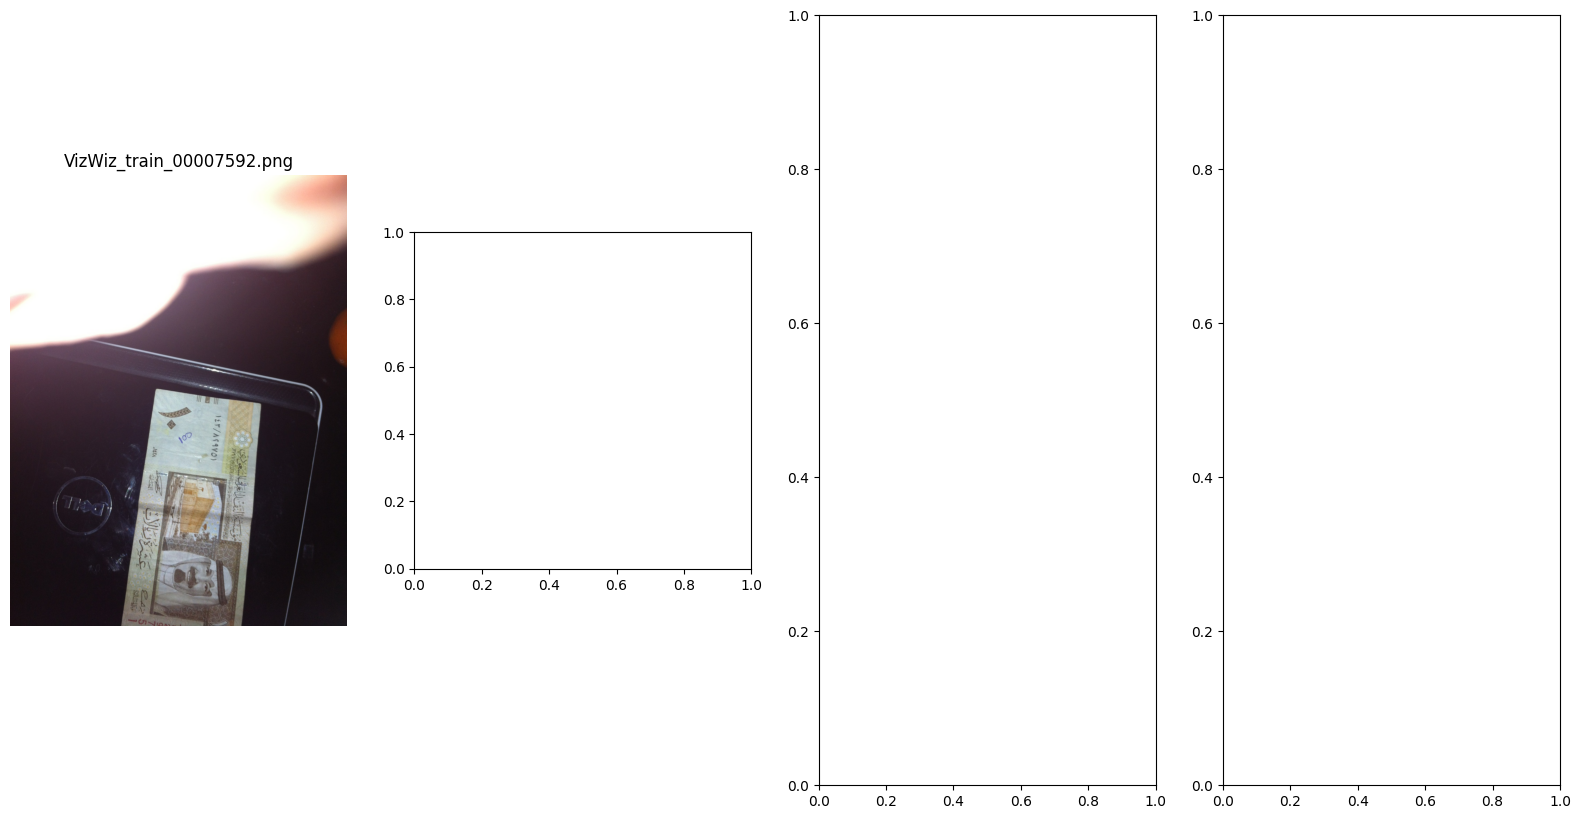

In [45]:
for i in range(0, len(fil_annotations_df), 4):
    file_names = fil_annotations_df['file_name'].iloc[i:i+4].values
    images = [Image.open(os.path.join(images_dir, file_name.replace('png', 'jpg'))) for file_name in file_names]
    show_images(images, titles=file_names, figsize=(20, 10))
